In [4]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float64 , shape=(N , D))
y = tf.placeholder(tf.float64 , shape=(N , D))
w1 = tf.placeholder(tf.float64 , shape=(D , H))
w2 = tf.placeholder(tf.float64 , shape=(H , D))

h = tf.maximum(tf.matmul(x,w1), 0)
yPred = tf.matmul(h,w2)

diff =yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2 , axis=1))

gradW1 , gradW2 = tf.gradients(loss , [w1,w2])


In [6]:
'''
weights as place holders

'''

'\nweights as place holders\n\n'

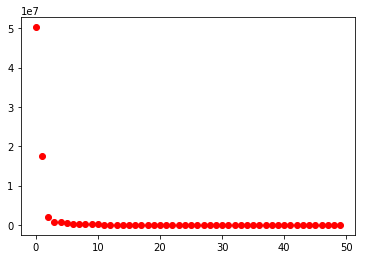

1360.5839


In [73]:
with tf.Session() as sess:
    values = {x:np.random.randn(N,D),
              w1:np.random.randn(D,H),
              w2:np.random.randn(H,D),
              y:np.random.randn(N,D)}
    
    learningRate = 1e-5
    steps = 50
    losses = []
    vx1=0
    vx2=0
    rho = 0.99
    
    for i in range(steps):
    
        out = sess.run([loss, gradW1, gradW2], feed_dict=values)
        lossVal, gradW1Val, gradW2Val = out
        
        vx1 = rho*vx1 + gradW1Val
        values[w1] -= learningRate * vx1
        
        vx2 = rho*vx2 + gradW2Val
        values[w2] -= learningRate * vx2
        
        losses.append(lossVal)
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [8]:
'''

weights as variables with adding updates implementaion to the session

'''

'\n\nweights as variables with adding updates implementaion to the session\n\n'

In [74]:
N , D , H = 64, 1000, 100
rho = 0.99


x = tf.placeholder(tf.float32 , shape=(N , D))
y = tf.placeholder(tf.float32 , shape=(N , D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))




h = tf.maximum(tf.matmul(x,w1), 0)
yPred = tf.matmul(h,w2)

diff =yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2 , axis=1))

gradW1 , gradW2 = tf.gradients(loss , [w1,w2])

learningRate = 1e-5


vx1 = 0
vx2 = 0

vx1 = rho*vx1 + gradW1
newW1 = w1.assign(w1 - learningRate *vx1)


vx2 = rho*vx2 + gradW2

newW2 = w2.assign(w2 - learningRate *vx2)


updates = tf.group(newW1,newW2)

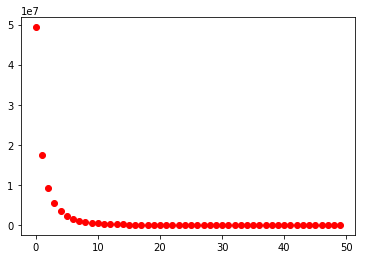

1012.46277


In [75]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D),
              y:np.random.randn(N,D)}
    
    steps = 50
    losses = []
    
    
    for i in range(steps):
    
        lossVal, _  = sess.run([loss, updates], feed_dict=values)
        losses.append(lossVal)
          
    
   
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)
    
    